### end to end predicting heart disease project 

we will build a model capable of predicting whether or not someone has heart disease based on there medical attributes. 

### 1.4 Which features of the data will be important to us?

During this step, you'll want to start exploring what each portion of the data relates to .

One of the most common ways to do this is to create a **data dictionary**.

#### Heart Disease Data Dictionary

A data dictionary describes the data you're dealing with. 

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |

> **Note:** No personal identifiable information (PPI) can be found in the dataset.



In [1]:
#preparing the tools 
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns 

# for building the Model
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.metrics import RocCurveDisplay 



# Print versions of libraries we're using  
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

NumPy version: 2.1.1
pandas version: 2.2.3
matplotlib version: 3.10.0
Scikit-Learn version: 1.6.1


In [2]:
#loading the data 

import pandas as pd 
df=pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape #(rows,coloumns)

(303, 14)

In [4]:
# data exploration (EDA) - getting to know the data set 
#show how many times each of the values of a categorical column (like : target) appear.
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

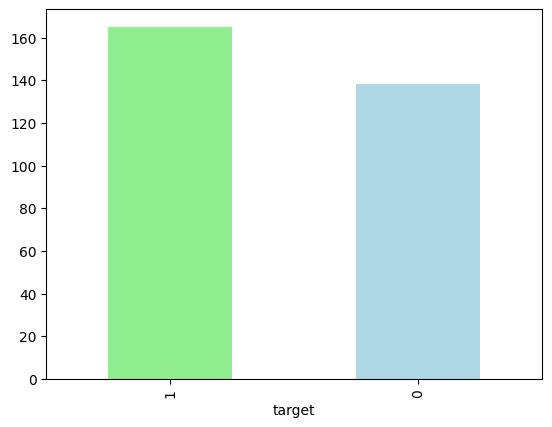

In [5]:
df.target.value_counts().plot(kind="bar", color=['lightgreen',"lightblue"])

In [6]:
df.info() # general info about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#checking for missing values 
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency according to sex (comparing coloumns)


In [9]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

according to the dict above 1 represents males ,so in this dataset we have more males than females

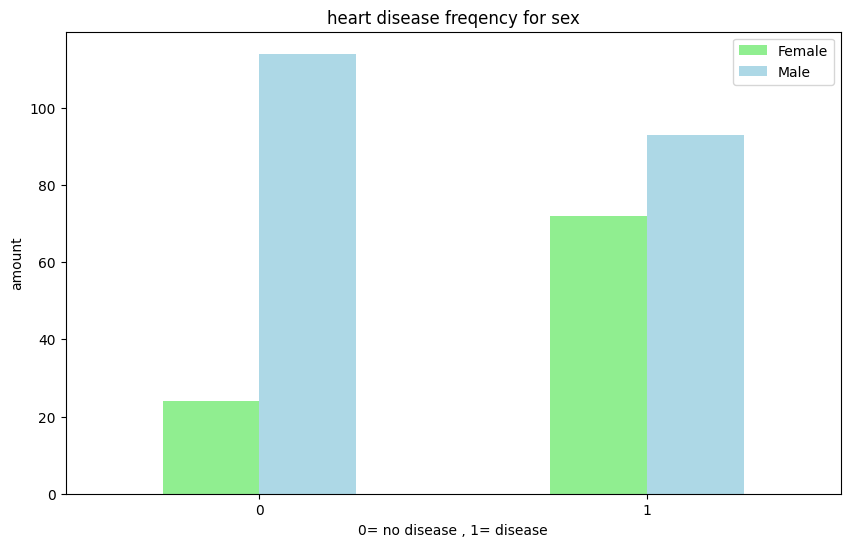

In [10]:
#compare target coloumn to sex coloumn 
pd.crosstab(df.target , df.sex).plot(kind="bar",
                                     figsize=(10,6),
                                     color=["lightgreen", "lightblue"])
plt.title('heart disease freqency for sex')
plt.xlabel("0= no disease , 1= disease")
plt.ylabel("amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

### age vs max heart rate for heart disease 

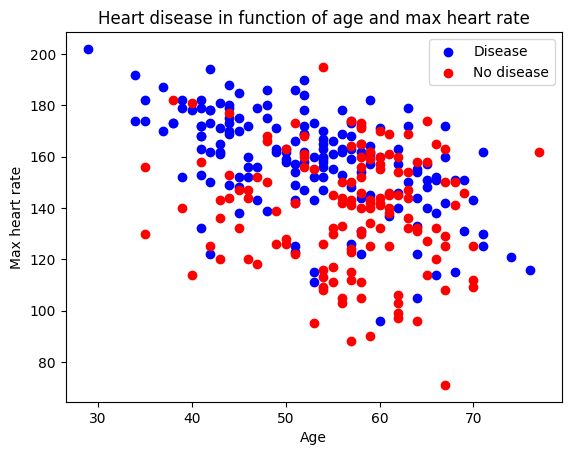

In [11]:
plt.Figure(figsize=(10,6))

# scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="blue")

# scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="red");
plt.title('Heart disease in function of age and max heart rate')
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No disease"]);


### 4.5 Correlation between independent variables

 we'll compare all of the independent variables in one hit.
Because this may give an idea of which independent variables may or may not have an impact on our target variable.


In [12]:
corr_matrix = df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


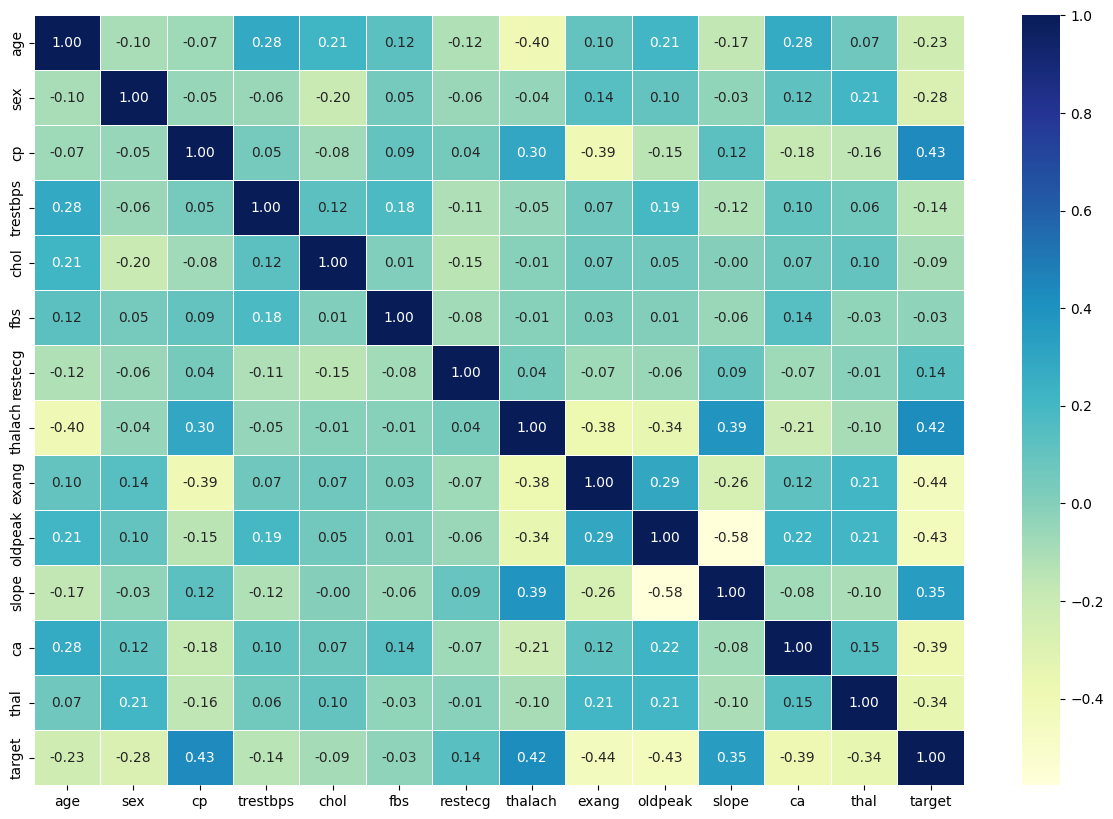

In [13]:
#plotting the correlation matrix 
corr_matrix=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu");

 A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

##  Modeling

We've explored the data, now we'll try to build a machine learning model to be able to predict our target variable based on the 13 independent variables.


But before we build a model, we have to get our dataset ready.



In [14]:
#splitting the coloumns to x and y
# x is all the independent features 
x=df.drop(labels="target", axis=1)

# y is Target variable

y =df.target.to_numpy() #this will extract the target column as a NumPy array.


In [15]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [16]:
y , type(y)

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### creating a trainning and test split 
this will help to mimic the real world environment as much as possible 
, like if we got a new patient who is not included in the original full dataset !

We'll use our training set to train our model and our test set to evaluate it.


In [17]:
# Random seed for reproducibility 
np.random.seed(42)

# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

In [18]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [19]:
y_train , len(y_train) , len (y_test)

(array([1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]),
 242,
 61)

we have 242 samples we can use to train our model , and 61 samples to test it

###  Choosing a model

We'll start by trying the following models and comparing their results.

1. Logistic Regression 
2. K-Nearest Neighbors 
3. RandomForest

In [20]:
# put models in a dictionary
models = { "Logistic Regression" : LogisticRegression() ,
            "KNN" : KNeighborsClassifier() ,
            "Random forest" : RandomForestClassifier()}

#create a function to fit and score the models 
def fit_and_score (models, x_train , x_test , y_train , y_test) :
    """ 
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data

    """
    np.random.seed(42)
    # make a dict to keep the models scores 
    models_scores = {}

    #loop through models 
    for name , model in models.items():
        model.fit(x_train , y_train) #fitting the model
        models_scores[name]= model.score(x_test , y_test)
    
    return models_scores


In [21]:
models_scores= fit_and_score(models=models,
                             x_train= x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test) 
models_scores

c:\Users\Windows10\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

### Comparing the results of  models

Since we've saved our models scores to a dictionary, we can plot them by first converting them to a DataFrame.

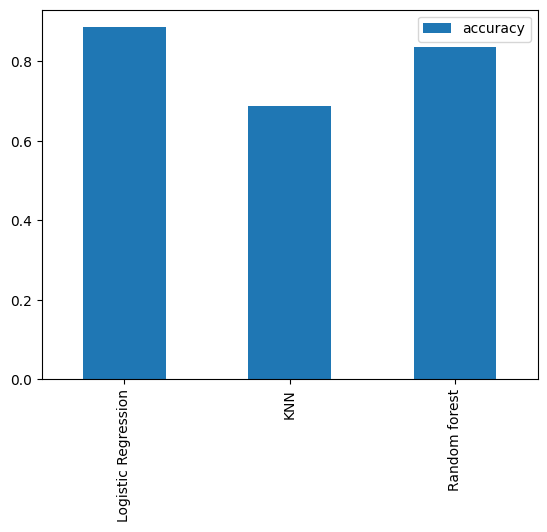

In [22]:
model_compare = pd.DataFrame(models_scores, index=['accuracy'])
model_compare.T.plot.bar();


From the plot it looks like the LogisticRegression() model performs best, 
 we've found the best model. 



### next step is to tune Hyperparameters , and see which performs best

In [23]:
# Tune KNeighborsClassifier 
train_scores = []
test_scores = [] 

# Create a list of different values for n_neighbors
neighbors = range(1, 21) # 1 to 20

# Setup algorithm
knn = KNeighborsClassifier()

# Loop through different neighbors values
for i in neighbors:
    knn.set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores
    test_scores.append(knn.score(x_test, y_test))

In [24]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [25]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

its hard to understand these numbers how about we will plot them for better viewing 

Maximum KNN score on the test data: 75.41%


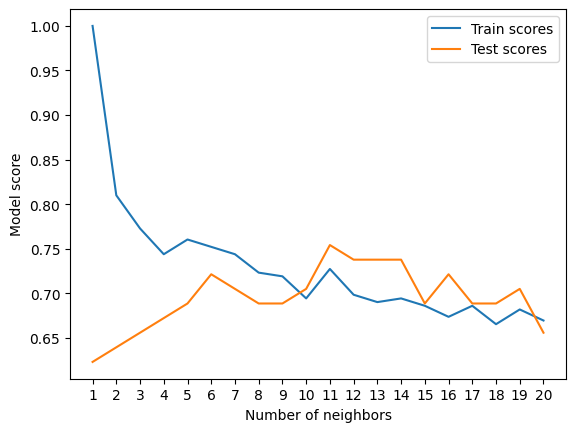

In [26]:
plt.plot(neighbors , train_scores , label="Train scores")
plt.plot(neighbors , test_scores , label='Test scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

The KNN's model performance didn't get near what LogisticRegression or the RandomForestClassifier did.

we can tune LogisticsRegression and RandomForestClassifier using RandomizedSearchCV


In [27]:
# create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [30]:
np.random.seed(42)


# Setup random hyperparameter search for LogisticRegression
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model
rs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [33]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [35]:
# will do the same for RandomForestClassifier 
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [38]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [40]:
# Evaluate the randomized search random forest model
rs_rf.score(x_test, y_test)

0.8688524590163934

In [41]:
# checking the previous scores 
models_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random forest': 0.8360655737704918}

we can see that when we used RandomizedSearchCV our Random forest score is higher now  
but Logisitic regression is still the best score we got .

### what about GridSearchCV ?

it will test every single possible combination of hyperparameters in the grid ( but can take quite a long time).

let's try it !

In [42]:
#rewritting the same grids but with GridSearchCV
# Different LogisticRegression hyperparameters
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [43]:
# Check the best parameters
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [44]:
# Evaluate the model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In this case, we get the same results as before since our grid only has a 

maximum of 20 different hyperparameter combinations.

In [46]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [47]:
y_test


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

They look like our original test data labels, except different where the model has predicred wrong.
Since we've got our prediction values we can find the metrics we want.

### ROC Curve and AUC Scores

note : What's a ROC curve?

It's a way of understanding how your model is performing by comparing the true positive rate to the false positive rate.

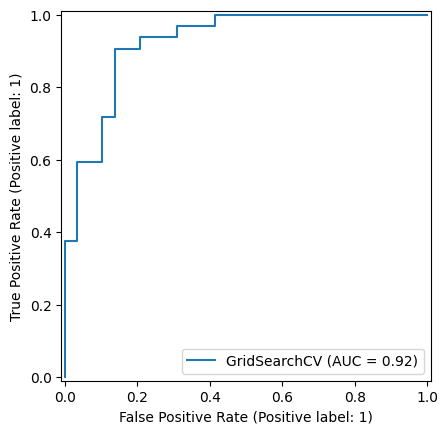

In [48]:
from sklearn.metrics import RocCurveDisplay 

# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=x_test, 
                               y=y_test); 

This is great, our model does far better than guessing which would be a line going from the bottom left corner to the top right corner, AUC = 0.5.

But a perfect model would achieve an AUC score of 1.0, so there's still room for improvement.

### next evaluation is through a confusion matrix.



In [49]:
# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


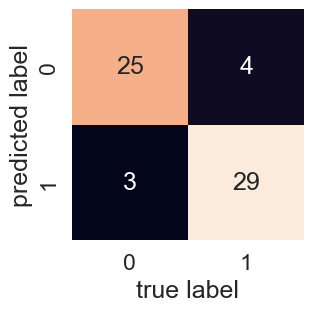

In [50]:
# Visulizing the above 
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

That looks much better. 

You can see the model gets confused (predicts the wrong label) relatively the same across both classes. 

In essence, there are 4 occasaions where the model predicted 0 when it should've been 1 (false negative) and 3 occasions where the model predicted 1 instead of 0 (false positive).

As further evaluation, we could look into these samples and see why this may be the case.

### using Classification report

A classification report will also give us information on the precision and recall of our model for each class.

In [51]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



these  metrics were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.
 
 ### cross validation 
 We'll take the best model along with the best hyperparameters and use cross_val_score() along with various scoring parameter values.

cross_val_score() works by taking an estimator (machine learning model) along with data and labels

In [52]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [54]:
# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

If we had have only chosen to go with the results of one data split, we might be thinking our model is under performing or over performing.

Since there are 5 metrics here, we'll take the average.



In [55]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

Now we'll do the same for other classification metrics.


In [62]:
# Cross-validated precision mean score
cv_precision = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

np.float64(0.8215873015873015)

In [63]:
# Cross-validated recall mean score
cv_recall = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="recall")) 
cv_recall

np.float64(0.9272727272727274)

In [64]:
# Cross-validated F1 mean score
cv_f1 = np.mean(cross_val_score(clf,
                                       x,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="f1")) 
cv_f1

np.float64(0.8705403543192143)

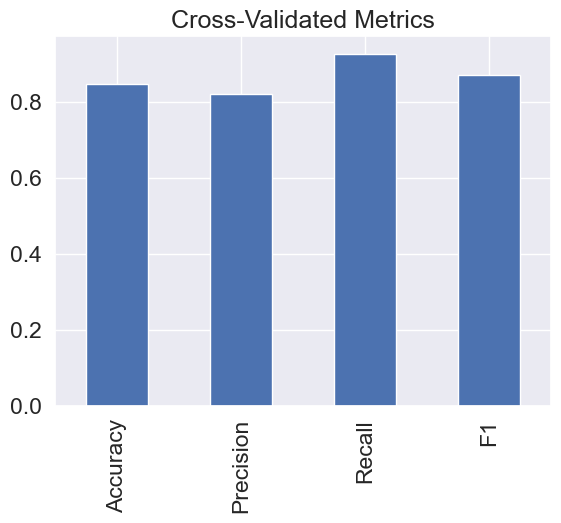

In [65]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

The final thing to check off the list of our model evaluation techniques is feature importance.

 ### Feature importance
Feature importance is another way of asking, "Which features contribute most to the outcomes of the model?"

For our problem, trying to predict heart disease using a patient's medical characteristics, getting the feature importance is like asking "Which characteristics contribute most to a model predicting whether someone has heart disease or not?"

In [67]:
# Fit an instance of LogisticRegression (taken from above)
clf.fit(x_train, y_train);

In [68]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

Looking at this it might not make much sense. But these values are how much each feature contributes to how a model makes a decision on whether patterns in a sample of patients health data leans more towards having heart disease or not.

Even knowing this, in it's current form, this coef_ array still doesn't mean much. But it will if we combine it with the columns (features) of our dataframe.

In [69]:
# Match features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'age': np.float64(0.0036992207735222936),
 'sex': np.float64(-0.9042409027676933),
 'cp': np.float64(0.6747282591013247),
 'trestbps': np.float64(-0.011613401311995881),
 'chol': np.float64(-0.001703643974904055),
 'fbs': np.float64(0.04787688089306608),
 'restecg': np.float64(0.3349019821325941),
 'thalach': np.float64(0.024729382907772574),
 'exang': np.float64(-0.6312040609811942),
 'oldpeak': np.float64(-0.5759095019287949),
 'slope': np.float64(0.4709514064291035),
 'ca': np.float64(-0.6516534774104941),
 'thal': np.float64(-0.6998420760932893)}

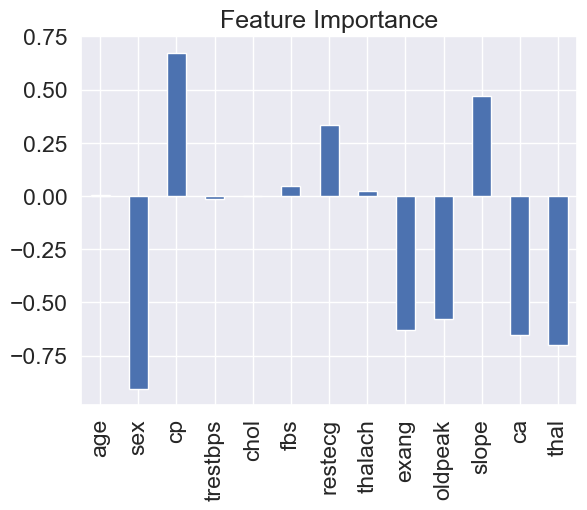

In [70]:
# Visualize feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

You'll notice some are negative and some are positive.

The larger the value (bigger bar), the more the feature contributes to the models decision.

If the value is negative, it means there's a negative correlation. And vice versa for positive values.

For example, the sex attribute has a negative value of -0.904, which means as the value for sex increases, the target value decreases.

In [71]:
# to have more understanding about the plot
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


You can see, when sex is 0 (female), there are almost 3 times as many (72 vs. 24) people with heart disease (target = 1) than without.

And then as sex increases to 1 (male), the ratio goes down to almost 1 to 1 (114 vs. 93) of people who have heart disease and who don't.

What does this mean?

It means the model has found a pattern which reflects the data. Looking at these figures and this specific dataset, it seems if the patient is female, they're more likely to have heart disease.

How about a positive correlation?

In [72]:
# Contrast slope (positive coefficient) with target
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


According to the model, there's a positive correlation of 0.470, not as strong as sex and target but still more than 0.

This positive correlation means our model is picking up the pattern that as slope increases, so does the target value.

Is this true?

When we look at the contrast (pd.crosstab(df["slope"], df["target"]) it is. As slope goes up, so does target.

What can we do with this information?

This is something we might want to talk to a subject matter expert about.

They may be interested in seeing where machine learning model is finding the most patterns (highest correlation) as well as where it's not (lowest correlation).